In [2]:
%pylab inline

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb
import time

Populating the interactive namespace from numpy and matplotlib


(-2000000000.0, 2000000000.0)

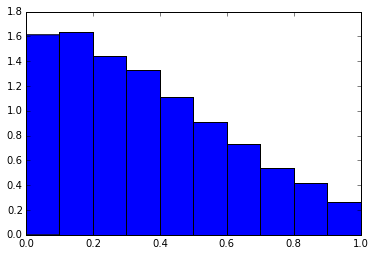

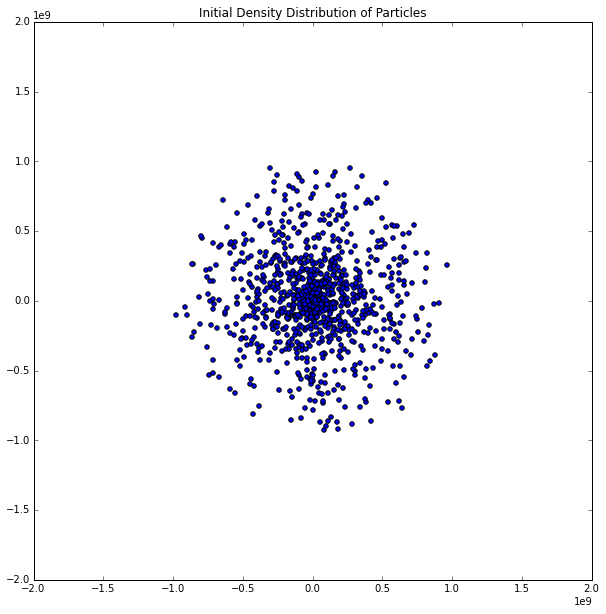

In [36]:
RJupiter = 1e9
lower, upper = 0, 1
mu, sigma = 0, 0.5
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
plt.hist(X.rvs(10000), normed=True)

nParticles = 1000
radiusDistribution = X.rvs(nParticles) * RJupiter
thetaDistribution = np.random.uniform(0, 2*np.pi, size=nParticles)

plt.figure(figsize=(10,10))
plt.scatter(radiusDistribution*np.cos(thetaDistribution), \
            radiusDistribution*np.sin(thetaDistribution))
plt.title("Initial Density Distribution of Particles")
plt.xlim(-2e9,2e9)
plt.ylim(-2e9,2e9)